**Import Library**

In [27]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os, shutil
from sklearn.model_selection import train_test_split

**Lihat Versi Tensorflow**

In [28]:
print(tf.__version__)

2.4.1


**Download dataset rockpaperscissors.zip**

In [29]:
#download data file yang ditempatkan di direktori /content/
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /content/rockpaperscissors.zip

--2021-05-06 08:16:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  2.28MB/s    in 3m 25s  

2021-05-06 08:20:04 (1.51 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



**Ekstraksi Data**

In [30]:
#ekstraksi file rockpaperscissors.zip di folder rps
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Menyiapkan Direktori dan Data Untuk Train dan Validation**

In [31]:
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [32]:
#pembuatan direktori train dan val yang diawali dengan pengecekan terlebih dahulu
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [33]:
#membagi direktori menjadi train (untuk data training) dan val (untuk data validation)
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [34]:
#membagi direktori rock, paper, dan scissors pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

#membagi direktori rock, paper, scissors pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [35]:
#eksekusi pembuatan direktori data training dan direktori data validasi untuk rock, paper, dan scissors
os.mkdir(train_rock_dir)
os.mkdir(train_paper_dir)
os.mkdir(train_scissors_dir)

os.mkdir(validation_rock_dir)
os.mkdir(validation_paper_dir)
os.mkdir(validation_scissors_dir)

In [36]:
#melihat isi direktori train dan val
print(os.listdir('/content/rockpaperscissors/train'))
print(os.listdir('/content/rockpaperscissors/val'))

['rock', 'paper', 'scissors']
['rock', 'paper', 'scissors']


In [37]:
#melihat jumlah data direktori rock, paper, scissors
print('total jumlah gambar rock:', len(os.listdir('/content/rockpaperscissors/rock')))
print('total jumlah gambar paper:', len(os.listdir('/content/rockpaperscissors/paper')))
print('total jumlah gambar scissors:', len(os.listdir('/content/rockpaperscissors/scissors')))

total jumlah gambar rock: 726
total jumlah gambar paper: 712
total jumlah gambar scissors: 750


In [38]:
#Memecah file dengan jumlah data validation 40% (874) dan data training 60% (1314) dengan train_test_split()
train_rock, validation_rock = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper, validation_paper = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors, validation_scissors = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [39]:
#mengcopy file dari direktori rock, paper, scissors dan membaginya berdasarkan jumlah yang telah ditentukan di tahap sebelumnya
for filename in train_rock:
  shutil.copy(os.path.join(rock_dir, filename), os.path.join(train_rock_dir, filename))
for filename in train_paper:
  shutil.copy(os.path.join(paper_dir, filename), os.path.join(train_paper_dir, filename))
for filename in train_scissors:
  shutil.copy(os.path.join(scissors_dir, filename), os.path.join(train_scissors_dir, filename))

for filename in validation_rock:
  shutil.copy(os.path.join(rock_dir, filename), os.path.join(validation_rock_dir, filename))
for filename in validation_paper:
  shutil.copy(os.path.join(paper_dir, filename), os.path.join(validation_paper_dir, filename))
for filename in validation_scissors:
  shutil.copy(os.path.join(scissors_dir, filename), os.path.join(validation_scissors_dir, filename))

In [40]:
print(len(os.listdir('/content/rockpaperscissors/train/rock'))) #jumlah data rock di train adalah 435, merupakan 60% dari total data rock 726
print(len(os.listdir('/content/rockpaperscissors/val/rock'))) #jumlah data rock di val adalah 291, merupakan 40% dari total data rock 726

435
291


**Menerapkan Augmentation dan Image Data Generator**

In [41]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [42]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        class_mode='categorical') # categorical karena gambar merupakan data 2 dimensi yang ada nilai X dan Y
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Arsitektur CNN Model Sequential**

In [43]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(3, activation='softmax')
])

model.summary() #menampilkan model yang dibuat

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

In [44]:
#mengcompile model yang telah dibuat
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Pelatihan Model**

In [45]:
class kelasCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.97):
            print("\nAkurasi lebih dari 97%, training berhenti disini!") 
            self.model.stop_training = True 
 
callbacks = kelasCallback()

In [46]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=41,  # jumlah data training adalah 1312, sehingga nilai steps nya adalah 1312 / batch_size = 1312 / 32 = 41
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=27,  # jumlah data validation adalah 876, sehingga 876 / 32 = 27
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/20
41/41 - 81s - loss: 1.0831 - accuracy: 0.4139 - val_loss: 0.9329 - val_accuracy: 0.6227
Epoch 2/20
41/41 - 74s - loss: 0.5841 - accuracy: 0.7759 - val_loss: 0.3251 - val_accuracy: 0.8773
Epoch 3/20
41/41 - 74s - loss: 0.2882 - accuracy: 0.8941 - val_loss: 0.2641 - val_accuracy: 0.9086
Epoch 4/20
41/41 - 74s - loss: 0.2421 - accuracy: 0.9245 - val_loss: 0.1896 - val_accuracy: 0.9433
Epoch 5/20
41/41 - 74s - loss: 0.2235 - accuracy: 0.9184 - val_loss: 0.2172 - val_accuracy: 0.9259
Epoch 6/20
41/41 - 74s - loss: 0.2256 - accuracy: 0.9284 - val_loss: 0.2236 - val_accuracy: 0.9271
Epoch 7/20
41/41 - 74s - loss: 0.1793 - accuracy: 0.9390 - val_loss: 0.1313 - val_accuracy: 0.9572
Epoch 8/20
41/41 - 74s - loss: 0.1829 - accuracy: 0.9360 - val_loss: 0.1910 - val_accuracy: 0.9213
Epoch 9/20
41/41 - 74s - loss: 0.1759 - accuracy: 0.9413 - val_loss: 0.0797 - val_accuracy: 0.9745
Epoch 10/20
41/41 - 74s - loss: 0.1376 - accuracy: 0.9588 - val_loss: 0.1309 - val_accuracy: 0.9606
Epoch 11/

**Fungsi Upload File**

Saving batu.png to batu.png
[[0. 1. 0.]]
batu.png
rock


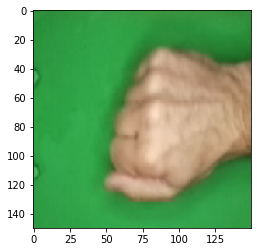

In [47]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving gunting.png to gunting.png
[[0. 0. 1.]]
gunting.png
scissors


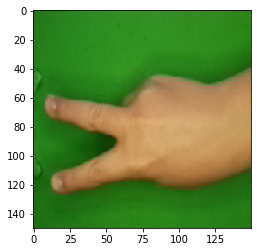

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving kertas.png to kertas.png
[[1. 0. 0.]]
kertas.png
paper


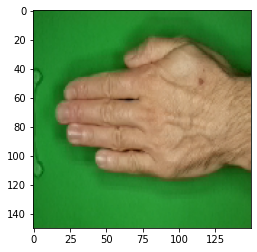

In [49]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')